In [6]:
import torch
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pyautogui


In [9]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

YOLOv5  v7.0-448-gdeec5e45 Python-3.9.25 torch-2.8.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2782.8ms pre-process, 87.9ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


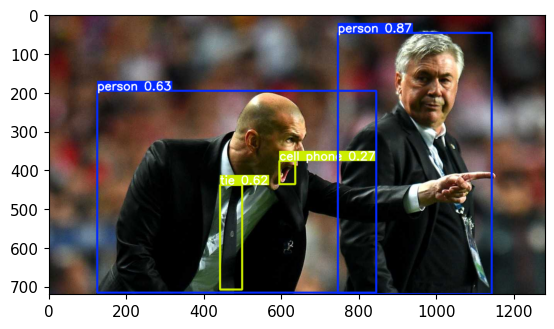

In [10]:
img = 'https://ultralytics.com/images/zidane.jpg'

results = model(img)
results.print()

plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.print()

image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2782.8ms pre-process, 87.9ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


In [17]:
results.crop()

Saved 1 image to runs\detect\exp
Saved results to runs\detect\exp



[{'box': [tensor(594.08179),
   tensor(377.30038),
   tensor(635.42395),
   tensor(437.14780)],
  'conf': tensor(0.27401),
  'cls': tensor(67.),
  'label': 'cell phone 0.27',
  'im': array([[[  5,  44,  46],
          [  5,  44,  46],
          [  5,  44,  46],
          ...,
          [  0, 237, 204],
          [  0, 237, 204],
          [  0, 237, 204]],
  
         [[  6,  44,  46],
          [  6,  44,  46],
          [  6,  44,  46],
          ...,
          [  0, 237, 204],
          [  0, 237, 204],
          [  0, 237, 204]],
  
         [[  5,  43,  45],
          [  5,  43,  45],
          [  5,  43,  45],
          ...,
          [  0, 237, 204],
          [  0, 237, 204],
          [  0, 237, 204]],
  
         ...,
  
         [[128, 149, 181],
          [133, 154, 186],
          [132, 153, 185],
          ...,
          [ 13,  14,  10],
          [ 12,  13,   9],
          [ 12,  13,   9]],
  
         [[124, 146, 181],
          [114, 136, 171],
          [113, 136, 168

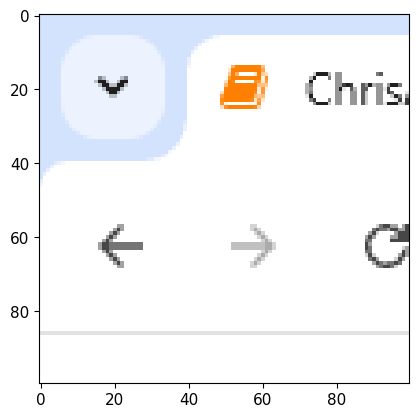

In [21]:
res = pyautogui.screenshot()
plt.imshow(np.array(res)[:100, :100])

In [22]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[25:625, 1122:, :]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-det

In [23]:
import uuid
import os
import time

In [25]:
IMAGES_PATH = os.path.join('data', 'images')
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 100

In [ ]:
for img_num in range(number_imgs):
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[25:625, 1122:, :]
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
    